### import all the required Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from scipy.stats import zscore
import statsmodels.api  as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(14,7)})

### Cleaning the data

In [3]:
data=pd.read_csv('car-mpg (1).csv')

In [4]:
data.shape

(398, 10)

In [5]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [7]:
data.tail()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
393,27.0,4,140.0,86,2790,15.6,82,1,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,1,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,1,chevy s-10


In [9]:
data.sample(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
377,31.0,4,91.0,68,1970,17.6,82,3,1,mazda glc custom
275,17.0,6,163.0,125,3140,13.6,78,2,0,volvo 264gl
60,20.0,4,140.0,90,2408,19.5,72,1,1,chevrolet vega
17,21.0,6,200.0,85,2587,16.0,70,1,0,ford maverick
161,16.0,6,250.0,105,3897,18.5,75,1,0,chevroelt chevelle malibu


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [11]:
data.drop('car_name',axis=1,inplace=True)

In [13]:
data[['origin','car_type']]=data[['origin','car_type']].astype('category')

In [15]:
data[data['hp']=='?']

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
32,25.0,4,98.0,?,2046,19.0,71,1,1
126,21.0,6,200.0,?,2875,17.0,74,1,0
330,40.9,4,85.0,?,1835,17.3,80,2,1
336,23.6,4,140.0,?,2905,14.3,80,1,1
354,34.5,4,100.0,?,2320,15.8,81,2,1
374,23.0,4,151.0,?,3035,20.5,82,1,1


In [17]:
data['hp']=data['hp'].replace('?',np.nan)
data.isna().sum()

mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
car_type    0
dtype: int64

In [18]:
data['hp']=data['hp'].fillna(data['hp'].median())

In [19]:
data.isna().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
dtype: int64

In [20]:
data['hp']=data['hp'].astype('int64')

In [22]:
data=pd.get_dummies(data,columns=['car_type'])

In [24]:
data=pd.get_dummies(data,columns=['origin'])

In [26]:
data.dtypes

mpg           float64
cyl             int64
disp          float64
hp              int64
wt              int64
acc           float64
yr              int64
car_type_0      uint8
car_type_1      uint8
origin_1        uint8
origin_2        uint8
origin_3        uint8
dtype: object

In [28]:
num_cols=data.select_dtypes(include=['int64','float64']).columns
print(num_cols)

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr'], dtype='object')


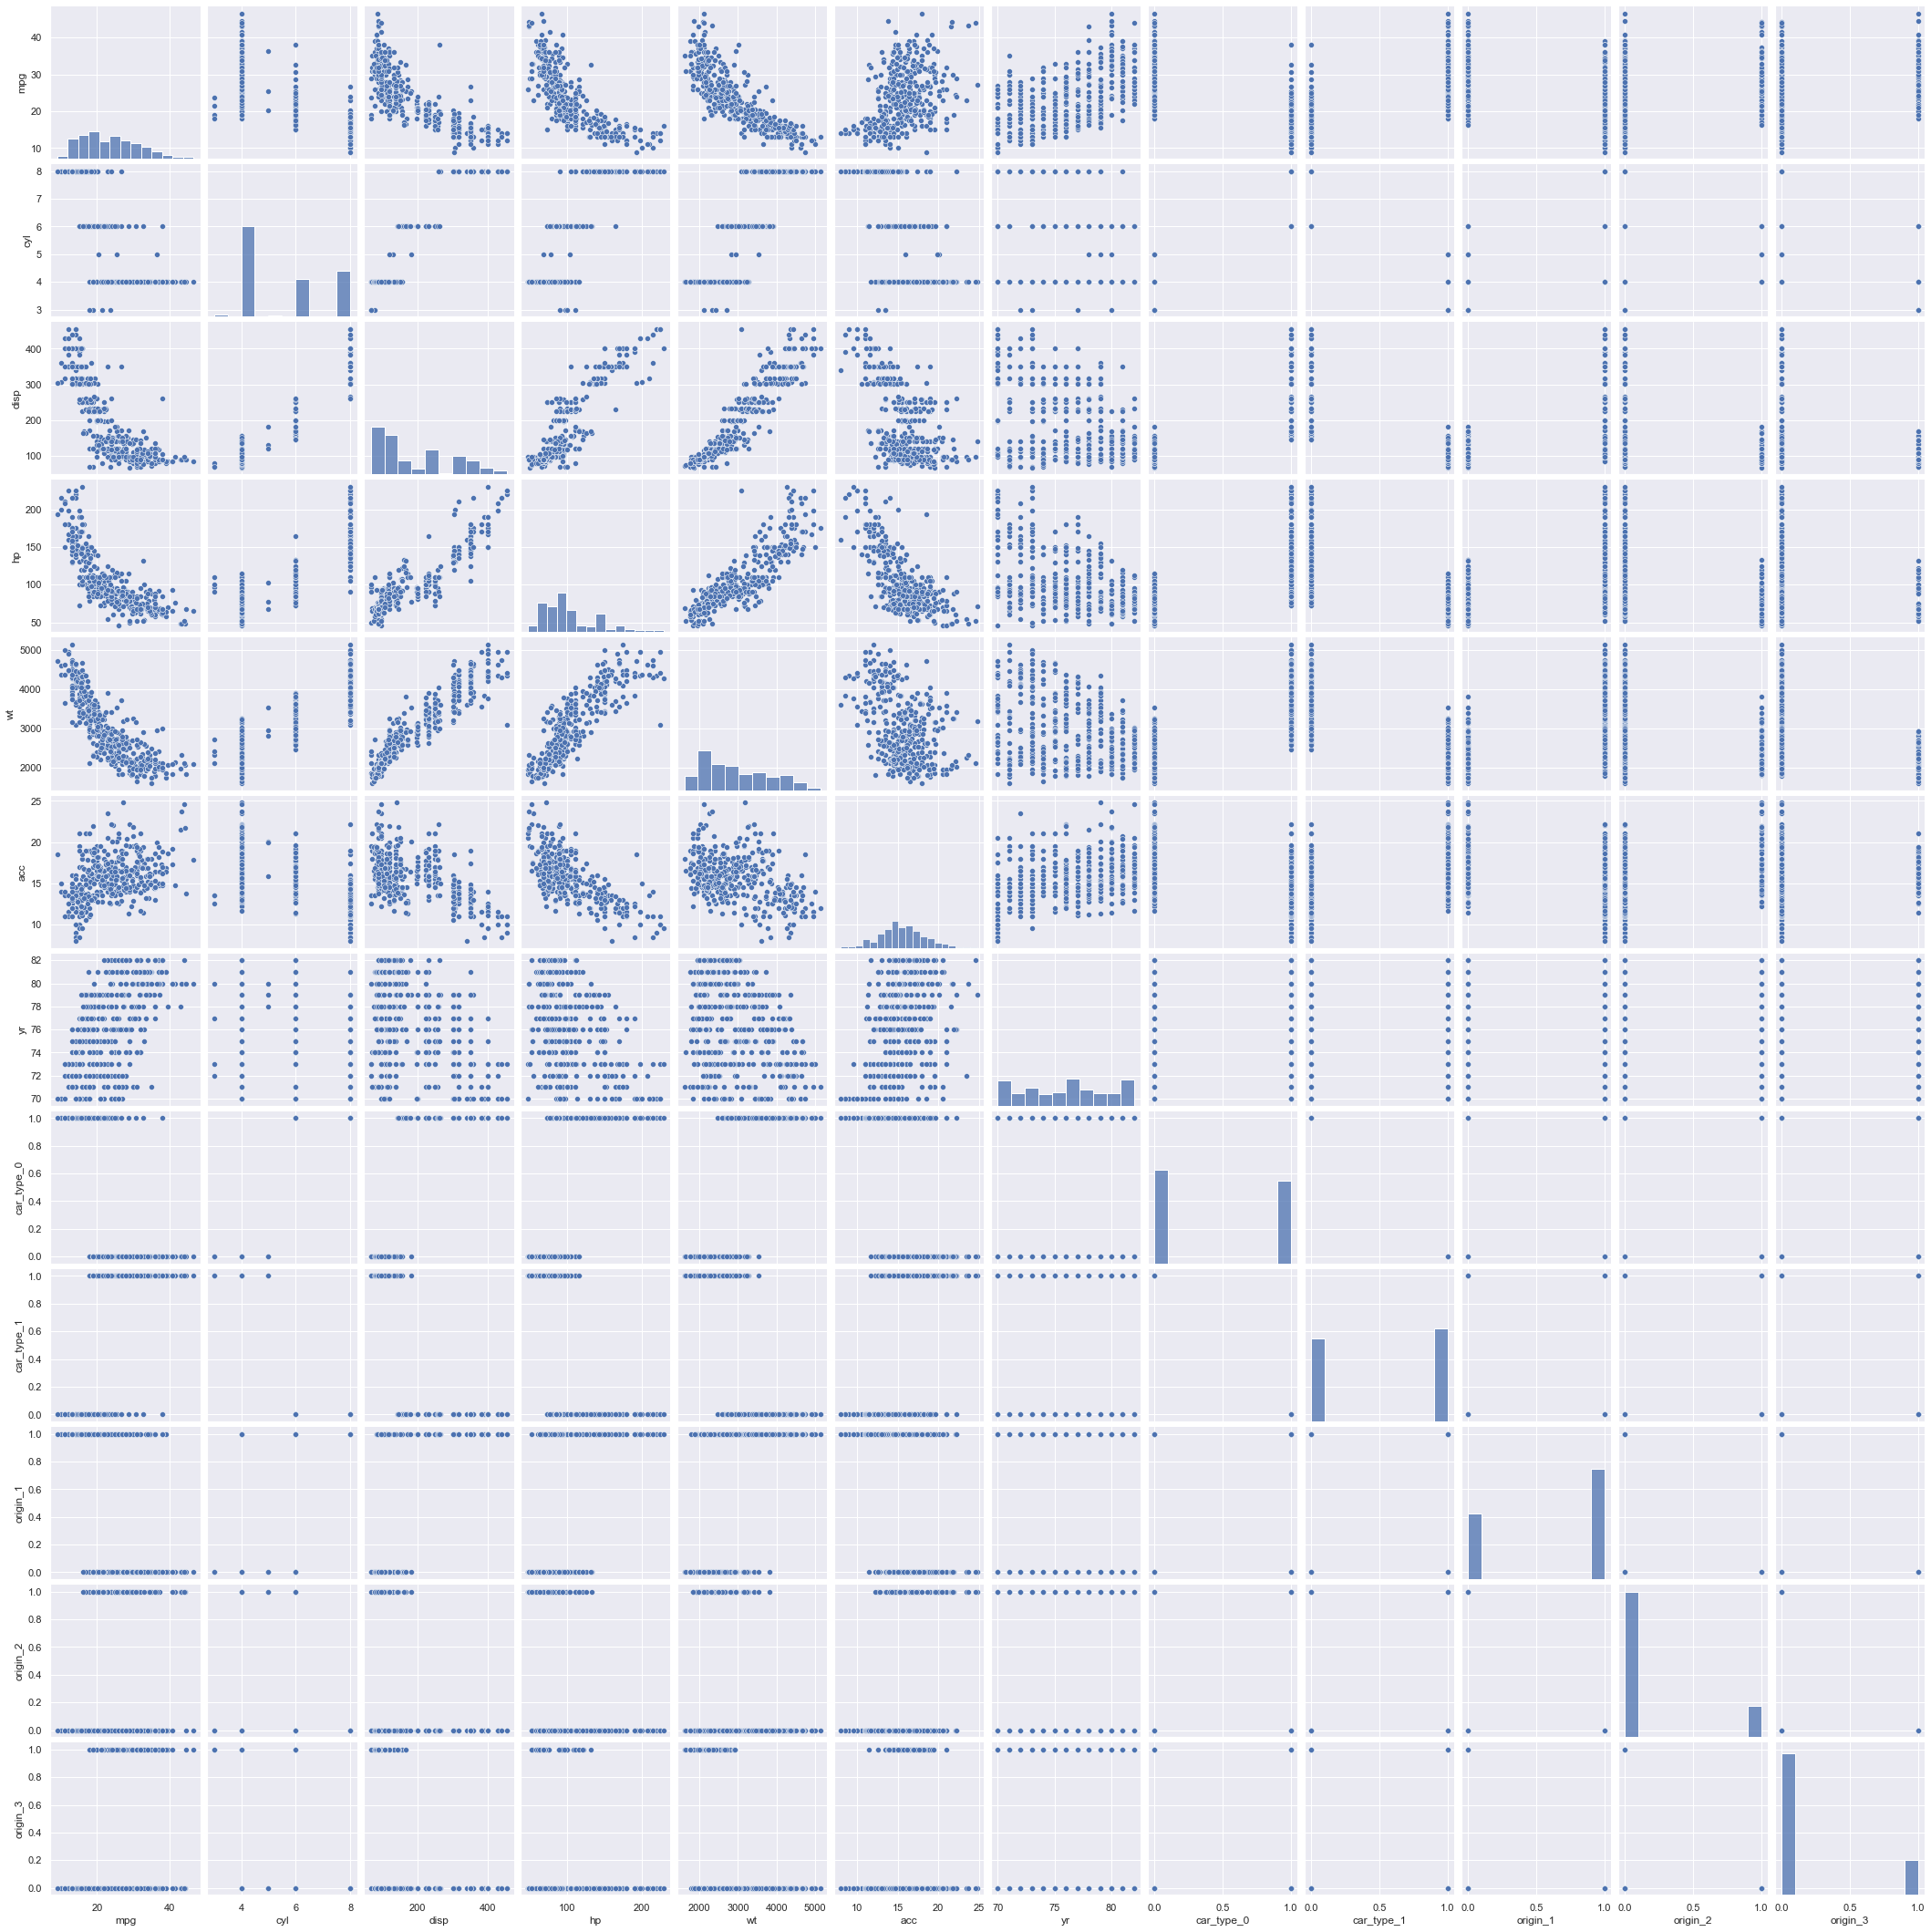

In [35]:
sns.pairplot(data=data)

<AxesSubplot:>

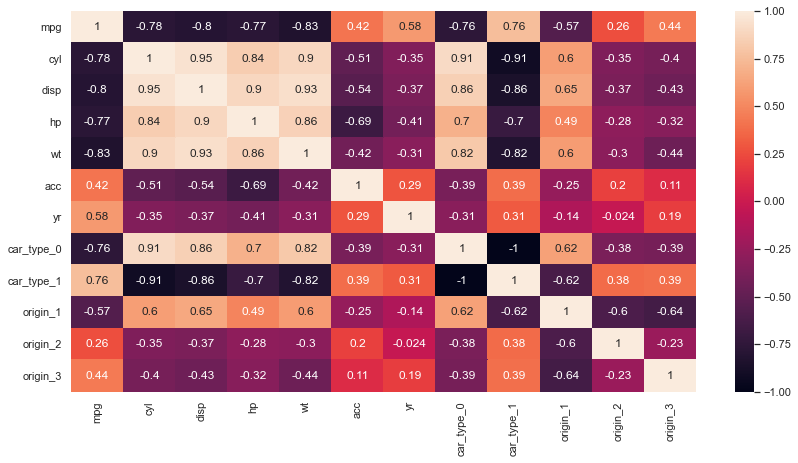

In [37]:
sns.heatmap(data.corr(),annot=True)

In [38]:
corr=data.corr()

In [40]:
corr[(corr>0.5) | (corr <-0.5)].style.background_gradient('magma')

,mpg,cyl,disp,hp,wt,acc,yr,car_type_0,car_type_1,origin_1,origin_2,origin_3
mpg,1.000000,-0.775396,-0.804203,-0.773522,-0.831741,nan,0.579267,-0.759207,0.759207,-0.568192,nan,nan
cyl,-0.775396,1.000000,0.950721,0.841367,0.896017,-0.505419,nan,0.912577,-0.912577,0.604351,nan,nan
disp,-0.804203,0.950721,1.000000,0.895849,0.932824,-0.543684,nan,0.855141,-0.855141,0.651407,nan,nan
hp,-0.773522,0.841367,0.895849,1.000000,0.862502,-0.686676,nan,0.701479,-0.701479,nan,nan,nan
wt,-0.831741,0.896017,0.932824,0.862502,1.000000,nan,nan,0.815445,-0.815445,0.598398,nan,nan
acc,nan,-0.505419,-0.543684,-0.686676,nan,1.000000,nan,nan,nan,nan,nan,nan
yr,0.579267,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan
car_type_0,-0.759207,0.912577,0.855141,0.701479,0.815445,nan,nan,1.000000,-1.000000,0.624215,nan,nan
car_type_1,0.759207,-0.912577,-0.855141,-0.701479,-0.815445,nan,nan,-1.000000,1.000000,-0.624215,nan,nan
origin_1,-0.568192,0.604351,0.651407,nan,0.598398,nan,nan,0.624215,-0.624215,1.000000,-0.597198,-0.643317


In [43]:
for i in num_cols:
    print(i," ",data['mpg'].corr(data[i]))

mpg   1.0
cyl   -0.7753962854205543
disp   -0.8042028248058979
hp   -0.7735224511398949
wt   -0.8317409332443351
acc   0.42028891210165065
yr   0.5792671330833097


In [29]:
new_data=data.copy()

In [30]:
new_data[num_cols]=new_data[num_cols].apply(zscore)

In [33]:
y=new_data[['mpg']]
x=new_data.drop('mpg',1)

,cyl,disp,hp,wt,acc,yr,car_type_0,car_type_1,origin_1,origin_2,origin_3
0,1.498191,1.090604,0.673277,0.630870,-1.295498,-1.627426,1,0,1,0,0
1,1.498191,1.503514,1.590065,0.854333,-1.477038,-1.627426,1,0,1,0,0
2,1.498191,1.196232,1.197156,0.550470,-1.658577,-1.627426,1,0,1,0,0
3,1.498191,1.061796,1.197156,0.546923,-1.295498,-1.627426,1,0,1,0,0
4,1.498191,1.042591,0.935216,0.565841,-1.840117,-1.627426,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479257,-0.213324,0.011586,1.621983,0,1,1,0,0
394,-0.856321,-0.925936,-1.369851,-0.993671,3.279296,1.621983,0,1,0,1,0
395,-0.856321,-0.561039,-0.531645,-0.798585,-1.440730,1.621983,0,1,1,0,0
396,-0.856321,-0.705077,-0.662615,-0.408411,1.100822,1.621983,0,1,1,0,0


### Creating Regression Model

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [46]:
linear=LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [52]:
for i,y in enumerate(x.columns):
    print(y,": ",round(linear.coef_[0][i],2))

cyl :  0.32
disp :  0.32
hp :  -0.23
wt :  -0.71
acc :  0.01
yr :  0.38
car_type_0 :  -0.38
car_type_1 :  0.38
origin_1 :  -0.18
origin_2 :  0.1
origin_3 :  0.08


In [53]:
yhat_linear=linear.predict(x_test)
print(metrics.r2_score(y_test,yhat_linear))

0.8513551223427654


<AxesSubplot:xlabel='hp', ylabel='mpg'>

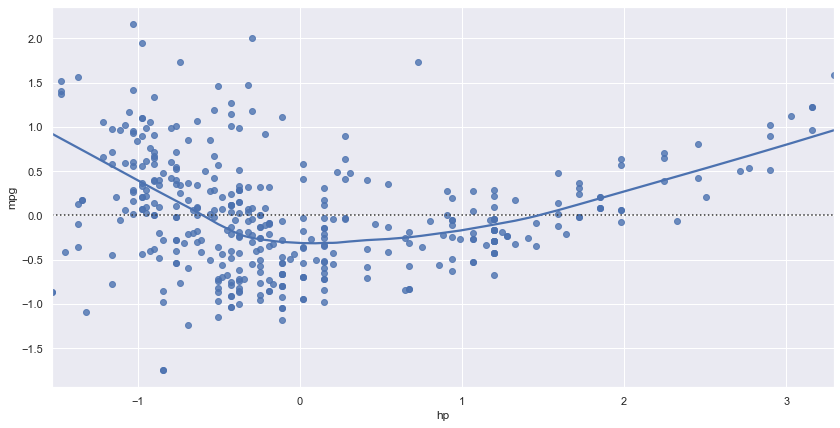

In [55]:
sns.residplot(new_data['hp'],new_data['mpg'],lowess=True)

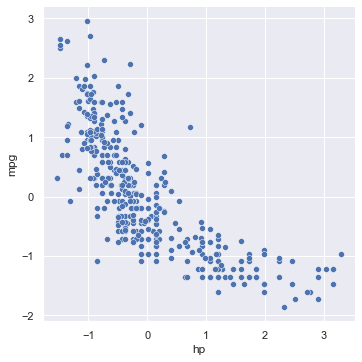

In [58]:
sns.relplot(new_data['hp'],new_data['mpg'])

<AxesSubplot:xlabel='acc', ylabel='mpg'>

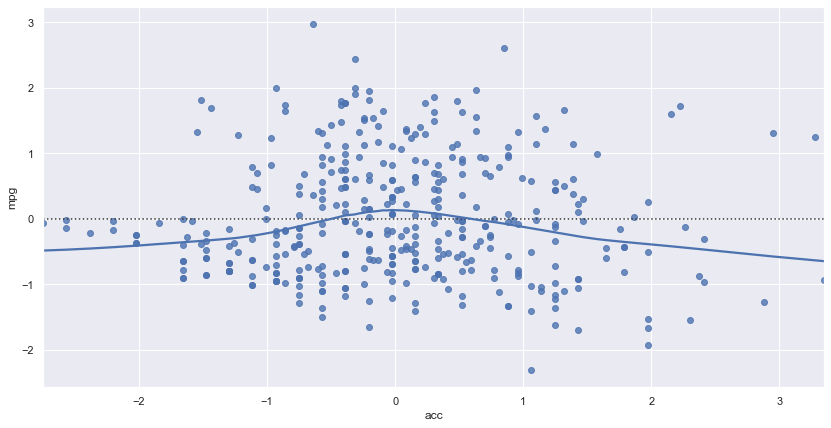

In [59]:
sns.residplot(new_data['acc'],new_data['mpg'],lowess=True)

<AxesSubplot:xlabel='yr', ylabel='mpg'>

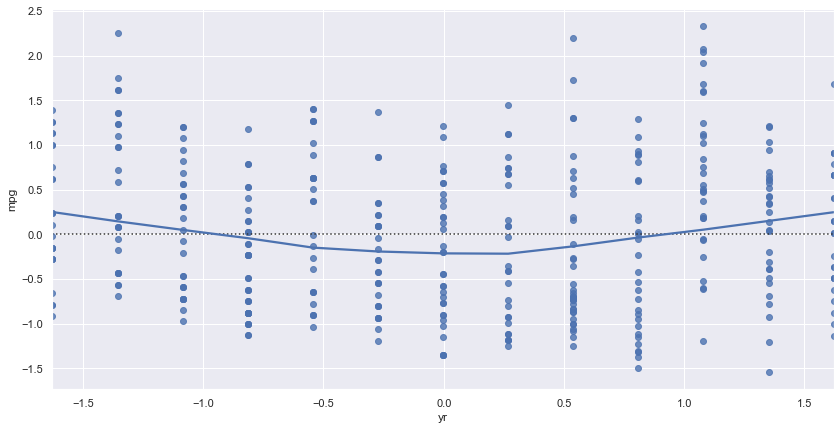

In [60]:
sns.residplot(new_data['yr'],new_data['mpg'],lowess=True)

<AxesSubplot:xlabel='mpg'>

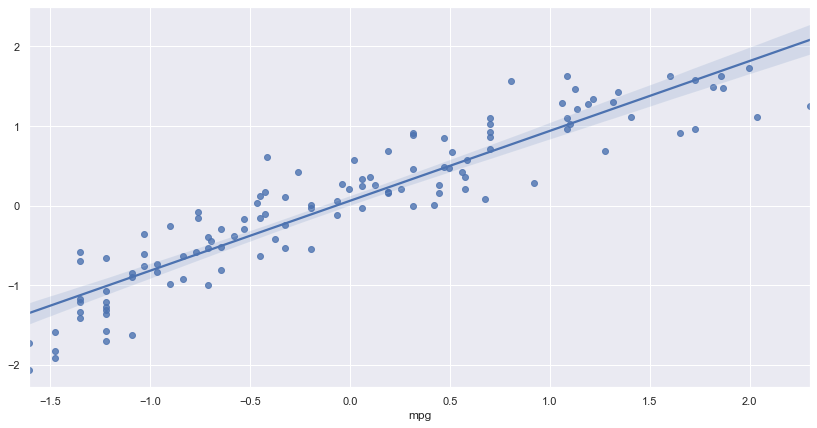

In [81]:
sns.regplot(y_test,yhat_linear)

In [82]:
print(metrics.r2_score(y_test,yhat_linear))

0.8513551223427654


In [84]:
np.sqrt(metrics.mean_squared_error(y_test,yhat_linear))

0.3776528496309282

In [88]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(random_state=0, max_depth=3)
dtree.fit(x_train,y_train)
yhat_dtree=dtree.predict(x_test)

In [89]:
metrics.r2_score(y_test,yhat_dtree)

0.7892652919447365

In [99]:
pd.DataFrame(index=x_train.columns,data=dtree.feature_importances_).sort_values(by=0,ascending=False)

,0
car_type_0,0.688613
hp,0.181610
yr,0.129777
cyl,0.000000
disp,0.000000
wt,0.000000
acc,0.000000
car_type_1,0.000000
origin_1,0.000000
origin_2,0.000000


In [100]:
important_x=['car_type_0','hp','yr']

In [104]:
dtree=DecisionTreeRegressor(random_state=0, max_depth=3)
dtree.fit(x_train[important_x],y_train)
yhat_dtree=dtree.predict(x_test[important_x])

In [105]:
metrics.r2_score(y_test,yhat_dtree)

0.7892652919447365

In [106]:
dtree.feature_importances_

array([0.68861316, 0.18160969, 0.12977715])